# Water-Quality-Prediction

### Importing libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import random

### Importing datasets




In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv(r'/content/drive/MyDrive/water_potability.csv')
df.head()


,ph,Turbidity,Potability
0,NaN,2.963135,0
1,3.716080,4.500656,0
2,8.099124,3.055934,0
3,8.316766,4.628771,0
4,9.092223,4.075075,0


In [5]:
df.shape #no.of (rows,columns) before cleaning

(3276, 3)

## Data Cleaning

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ph          2785 non-null   float64
 1   Turbidity   3276 non-null   float64
 2   Potability  3276 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 76.9 KB


In [7]:
df.isnull().sum()


ph            491
Turbidity       0
Potability      0
dtype: int64

In [8]:
df.fillna(df.mean(),inplace = True)

In [9]:
df.isnull().sum()

ph            0
Turbidity     0
Potability    0
dtype: int64

## Exploratory Data Analysis

In [10]:
df.describe()

,ph,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000
mean,7.080795,3.966786,0.390110
std,1.469956,0.780382,0.487849
min,0.000000,1.450000,0.000000
25%,6.277673,3.439711,0.000000
50%,7.080795,3.955028,0.000000
75%,7.870050,4.500320,1.000000
max,14.000000,6.739000,1.000000


In [11]:
df.head()


,ph,Turbidity,Potability
0,7.080795,2.963135,0
1,3.716080,4.500656,0
2,8.099124,3.055934,0
3,8.316766,4.628771,0
4,9.092223,4.075075,0


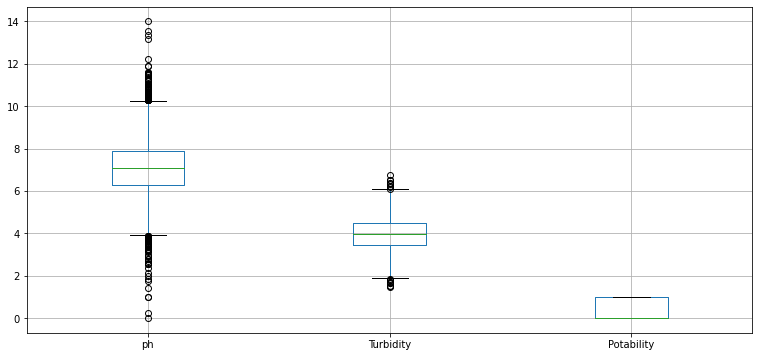

In [12]:
df.boxplot(figsize=(13,6))
plt.show()

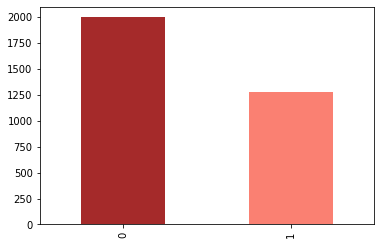

In [13]:
df.Potability.value_counts().plot(kind="bar", color=["brown", "salmon"])
plt.show()


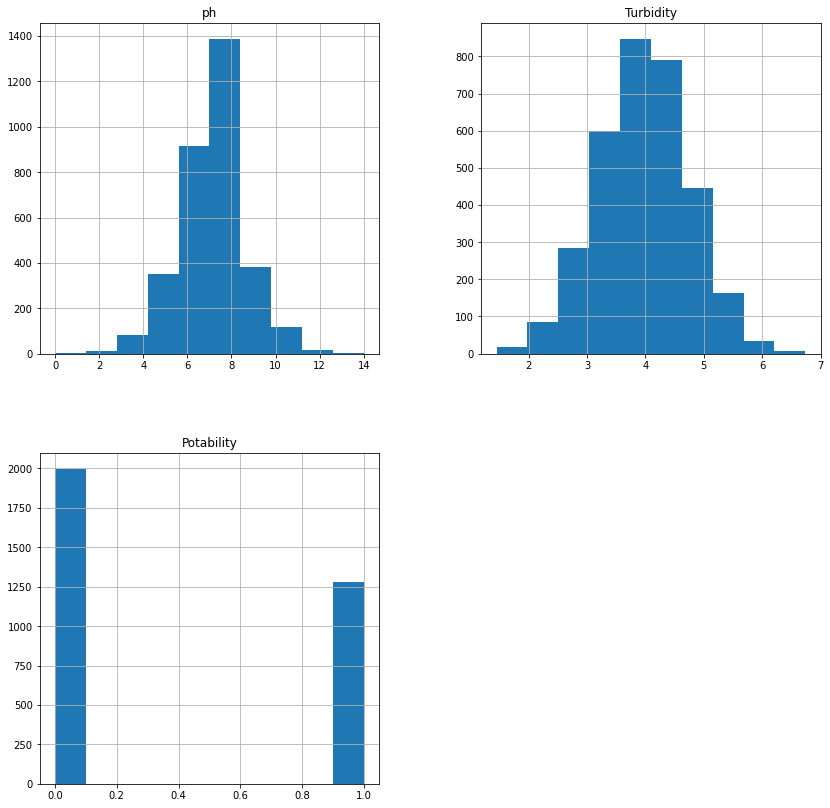

In [14]:
df.hist(figsize=(14,14))
plt.show()


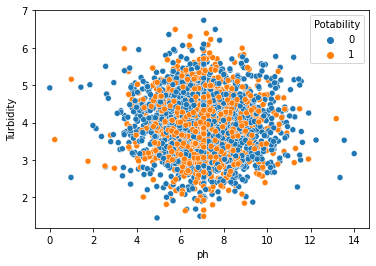

In [15]:
sns.scatterplot(x=df['ph'] , hue=df['Potability'] , y=df['Turbidity'])
plt.show()

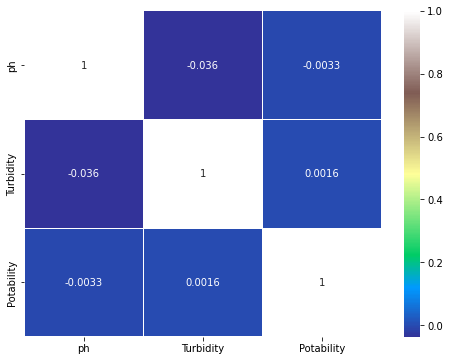

In [16]:
# create a correlation heatmap
sns.heatmap(df.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()


##Partitioning

In [17]:
X = df.drop('Potability',axis=1) #Input variables


In [18]:
Y= df['Potability'] #Target variables


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)


In [20]:
Y_train.value_counts()


0    1596
1    1024
Name: Potability, dtype: int64

In [21]:
Y_test.value_counts()


0    402
1    254
Name: Potability, dtype: int64

In [22]:
X_train.value_counts()

ph         Turbidity
0.975578   2.533996     1
7.494391   3.579652     1
7.464485   3.880576     1
7.466558   4.991675     1
7.468617   3.384179     1
                       ..
6.664003   2.227728     1
6.665774   4.903553     1
6.669532   1.964863     1
6.676137   4.336648     1
13.541240  3.529191     1
Length: 2620, dtype: int64

In [23]:
X_test.value_counts()

ph         Turbidity
0.000000   4.928840     1
7.369912   3.821721     1
7.377037   4.531659     1
7.381758   3.338022     1
7.392084   3.778458     1
                       ..
6.630364   3.490588     1
6.632032   3.386294     1
6.632206   3.443741     1
6.635894   4.523237     1
14.000000  3.170994     1
Length: 656, dtype: int64

# Model Training

## Algorithm 1:-Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 100, splitter= 'best')
dt.fit(X_train.values,Y_train)


DecisionTreeClassifier(min_samples_split=100)

In [25]:
Y_prediction=dt.predict(X_test.values)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [27]:
accuracy_score(Y_prediction,Y_test)*100

56.09756097560976

In [28]:
confusion_matrix(Y_prediction,Y_test)

array([[308, 194],
       [ 94,  60]])

In [29]:
Y_test.shape

(656,)

## Algorithm-2:KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier


In [31]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=22)
knn.fit(X_train.values,Y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=22)

In [32]:
prediction_knn=knn.predict(X_test.values)
accuracy_knn=accuracy_score(Y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(Y_test,prediction_knn)*100,'%')


accuracy_score score     :  61.12804878048781 %


In [33]:
confusion_matrix(Y_prediction,Y_test)


array([[308, 194],
       [ 94,  60]])

# Chemicals

In [34]:
def chemical(a,b):
  if(a<6):
    potability="Water is Not portable and Add NaOH for the water body to make it potable"
    return potability
  if((a>=6 and a<=8) and (b>=5)):
    potability="The water is not potable and Add polycrylamide which is a common type of polymeric flocculant that has been successful in reducing sediment erosion and Turbidity"
    return potability
  if(a>8):
    potability="Water is Not portable and Add Mild Acdic Substance like lime stone"
    return potability
  if(b>100):
    potability="Water is Not portable and Add Chlorine to the water body"
    return potability
  if((a>=6 and a<=8) and (b<=5)):
    potability="The Water is Potable"
    return potability

# Input Data


In [35]:
ph=round(random.uniform(0,14),2)
tbt=round(random.uniform(0,10),2)
print(ph)
print(tbt)

4.0
3.24


In [36]:
X_DT=dt.predict([[ph,tbt]])
result = chemical(ph,tbt)
print(result)

Water is Not portable and Add NaOH for the water body to make it potable


## Giving random 10 days to predict 30days ahead (Shoud give sensor data here for turbidity)

In [37]:
ph_pred = []
ph_pred.append(ph)
for i in range(0,9):
    ph=ph+round(random.uniform(-0.5,0.5),2)
    ph_pred.append(ph)
    
print(ph_pred)

[4.0, 4.25, 4.3, 4.25, 4.35, 4.47, 4.22, 3.82, 4.29, 3.97]


In [38]:
tbt_pred = []
tbt_pred.append(tbt)

for i in range(0,9):
    tbt=tbt+round(random.randint(-2,2),2)
    if(tbt<0):
      tbt=0
    tbt_pred.append(tbt)
    
print(tbt_pred)

[3.24, 3.24, 3.24, 5.24, 7.24, 9.24, 8.24, 8.24, 6.24, 6.24]



# 30Days ahead prediction

In [39]:
def average(arr,j,n):
  sum=0
  for i in range(j,n):
    sum=sum+arr[i]
  avg=sum/n
  return avg

In [40]:
prediction_ph = []
idx=0
for i in range(0,30):
  avg = average(ph_pred,idx,len(ph_pred))
  ph_pred.append(avg)
  prediction_ph.append(avg)
  idx=idx+1
print(prediction_ph)

[4.191999999999999, 3.828363636363636, 3.4741969696969695, 3.1434277389277385, 2.83985631035631, 2.5498563103563106, 2.27048131035631, 2.0222460162386633, 1.8100237940164408, 1.5842343203322304, 1.3857343203322305, 1.1861152727131827, 1.0120987437875633, 0.8610467016268252, 0.7300705458381694, 0.6164762934239171, 0.5184048968717513, 0.4343129964881842, 0.3620899244796605, 0.2996753108928867, 0.2468675002151457, 0.20216639310765436, 0.16510029083536745, 0.13443063193271396, 0.10910572894368974, 0.08824657049117061, 0.07112222900717291, 0.05711128584847691, 0.04568199646720891, 0.036397639429268894]


In [42]:
prediction_ph = []
for i in range(0,30):
    a=sum(ph_pred[len(ph_pred)-10+i:])+ sum(prediction_ph)
    b=a/10
    if(b>14):
        b=14
    prediction_ph.append(b)
print(prediction_ph)

[0.11562302662778692, 0.10249857926905107, 0.09253179788519075, 0.08527494859017307, 0.08035938025591897, 0.0774847453871419, 0.07640856287673903, 0.07693719626369563, 0.07891978730521751, 0.08224356638901838, 0.08682815908499333, 0.09551097499349266, 0.10506207249284191, 0.1155682797421261, 0.12712510771633873, 0.13983761848797258, 0.15382138033676984, 0.16920351837044684, 0.1861238702074915, 0.20473625722824065, 0.2252098829510647, 0.24773087124617116, 0.2725039583707883, 0.2997543542078671, 0.32972978962865385, 0.36270276859151923, 0.39897304545067114, 0.43887034999573826, 0.48275738499531207, 0.5310331234948433]


In [43]:
prediction_tbt = []
for i in range(0,30):
    a=sum(tbt_pred[len(tbt_pred)-10+i:])+ sum(prediction_tbt)
    b=a/10
    if(b>14):
        b=14
    prediction_tbt.append(b)
print(prediction_tbt)

[6.040000000000001, 6.320000000000001, 6.628000000000002, 6.966800000000001, 7.139480000000001, 7.129428000000002, 6.918370800000001, 6.786207880000001, 6.640828668, 6.680911534800001, 6.72500268828, 7.397502957108, 8.1372532528188, 8.95097857810068, 9.846076435910748, 10.830684079501822, 11.913752487452005, 13.105127736197204, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]


In [46]:
X_DT=dt.predict([[prediction_ph[-1],prediction_tbt[-1]]])
result=chemical(prediction_ph[-1],prediction_tbt[-1])
print(result)
print(prediction_ph[-1])
print(prediction_tbt[-1])

Water is Not portable and Add NaOH for the water body to make it potable
0.5310331234948433
14


# APP

In [47]:
!pip install flask-ngrok 

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask,jsonify
app =Flask(__name__)
run_with_ngrok(app) #starts ngrok when the app is running
@app.route("/<float:pH>/<float:Turbidity>")
def home(pH,Turbidity):
  print(pH)
  print(Turbidity)
  res = chemical(pH,Turbidity)
  print(res)
  result = {"Prediction for next 30 days":res}
  return jsonify(result)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://5a8b-34-125-116-53.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [26/Apr/2022 17:43:17] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [26/Apr/2022 17:44:18] "GET /11.2/3.4 HTTP/1.1" 200 -


11.2
3.4
Water is Not portable and Add Mild Acdic Substance like lime stone


127.0.0.1 - - [26/Apr/2022 17:44:18] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [26/Apr/2022 17:47:03] "GET /11.2/7.4 HTTP/1.1" 200 -


11.2
7.4
Water is Not portable and Add Mild Acdic Substance like lime stone


127.0.0.1 - - [26/Apr/2022 17:47:16] "GET /11.2/7.4 HTTP/1.1" 200 -


11.2
7.4
Water is Not portable and Add Mild Acdic Substance like lime stone


127.0.0.1 - - [26/Apr/2022 17:47:24] "GET /8.5/1.2 HTTP/1.1" 200 -


8.5
1.2
Water is Not portable and Add Mild Acdic Substance like lime stone


127.0.0.1 - - [26/Apr/2022 17:47:27] "GET /8.5/1.2 HTTP/1.1" 200 -


8.5
1.2
Water is Not portable and Add Mild Acdic Substance like lime stone


127.0.0.1 - - [26/Apr/2022 17:47:34] "GET /6.7/1.2 HTTP/1.1" 200 -


6.7
1.2
The Water is Potable


127.0.0.1 - - [26/Apr/2022 18:10:18] "GET /6.6/3.5 HTTP/1.1" 200 -


6.6
3.5
The Water is Potable


127.0.0.1 - - [26/Apr/2022 18:10:30] "GET /12/8.7 HTTP/1.1" 404 -
127.0.0.1 - - [26/Apr/2022 18:10:40] "GET /12/9.7 HTTP/1.1" 404 -
127.0.0.1 - - [26/Apr/2022 18:10:46] "GET /3/9.7 HTTP/1.1" 404 -
127.0.0.1 - - [26/Apr/2022 18:11:25] "GET /6.7/3.4 HTTP/1.1" 200 -


6.7
3.4
The Water is Potable


127.0.0.1 - - [26/Apr/2022 18:12:15] "GET /11.2/2.2 HTTP/1.1" 200 -


11.2
2.2
Water is Not portable and Add Mild Acdic Substance like lime stone


127.0.0.1 - - [26/Apr/2022 18:12:24] "GET /11.2/2.2 HTTP/1.1" 200 -


11.2
2.2
Water is Not portable and Add Mild Acdic Substance like lime stone


127.0.0.1 - - [26/Apr/2022 18:12:25] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [26/Apr/2022 18:12:43] "GET /6.7/3.4 HTTP/1.1" 200 -


6.7
3.4
The Water is Potable


127.0.0.1 - - [26/Apr/2022 18:12:47] "GET /6.7/10 HTTP/1.1" 404 -
127.0.0.1 - - [26/Apr/2022 18:14:09] "GET /3.1/2.1 HTTP/1.1" 200 -


3.1
2.1
Water is Not portable and Add NaOH for the water body to make it potable


127.0.0.1 - - [26/Apr/2022 18:14:59] "GET /6.7/3.2 HTTP/1.1" 200 -


6.7
3.2
The Water is Potable


127.0.0.1 - - [26/Apr/2022 18:15:12] "GET /6.7/3.2 HTTP/1.1" 200 -


6.7
3.2
The Water is Potable


127.0.0.1 - - [26/Apr/2022 18:20:31] "GET /13/12 HTTP/1.1" 404 -
127.0.0.1 - - [26/Apr/2022 18:20:43] "GET /11/7 HTTP/1.1" 404 -
127.0.0.1 - - [26/Apr/2022 18:22:43] "GET /11/3.4 HTTP/1.1" 404 -
